In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
# %% [code] -- Data Loading
def load_and_prepare_data(file_path):
    df = pd.read_excel(file_path, header=None, na_values=["", "NA", "N/A"])
    df = df.T  # Transpose to get samples as rows
    
    # Last 25 columns are targets
    y = df.iloc[:, -25:]
    x = df.iloc[:, :-25]
    
    return x, y

# Load data
x_train, y_train = load_and_prepare_data('full_train.xlsx')
x_test, y_test = load_and_prepare_data('full_test.xlsx')

# Ensure feature dimensions match


# Convert to DataFrame after padding
x_test = pd.DataFrame(x_test, columns=range(x_train.shape[1]))

# Handle NaNs (optional: replace with mean or median)
x_test.fillna(x_train.mean(), inplace=True)  # Or use imputation techniques

In [3]:
# %% [code] -- Model Training
# Train model
model = MultiOutputRegressor(LinearRegression())
model.fit(x_train, y_train)

# Make predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

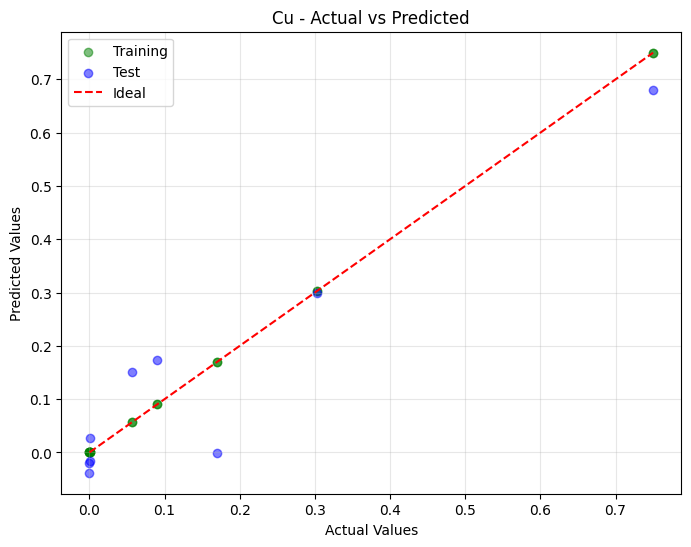

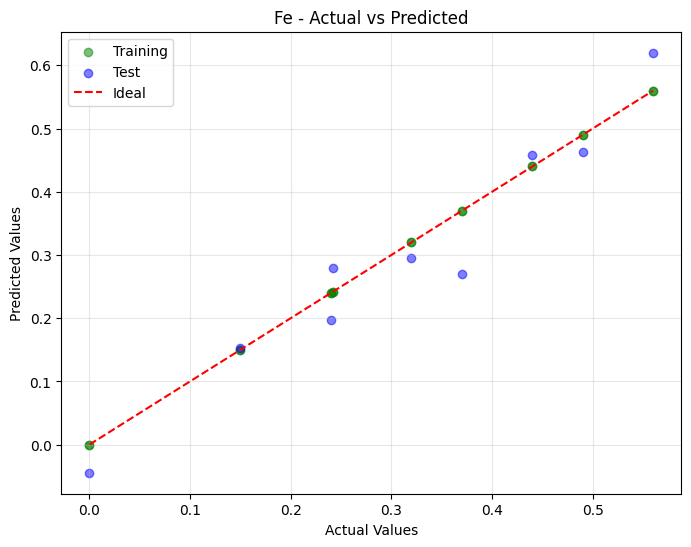

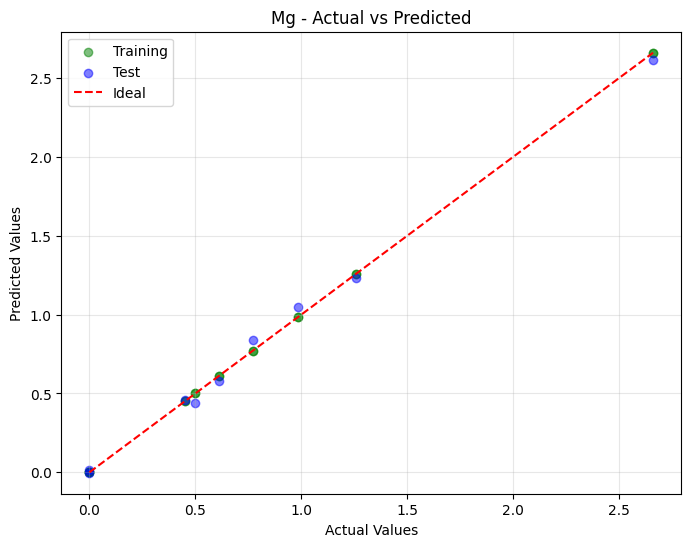

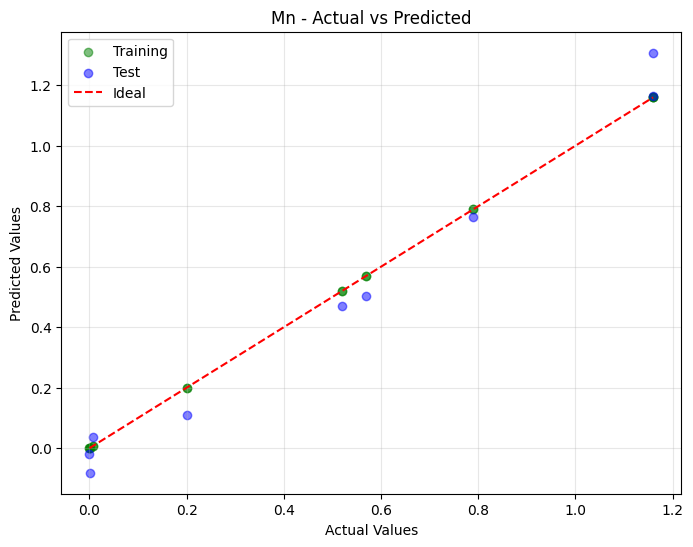

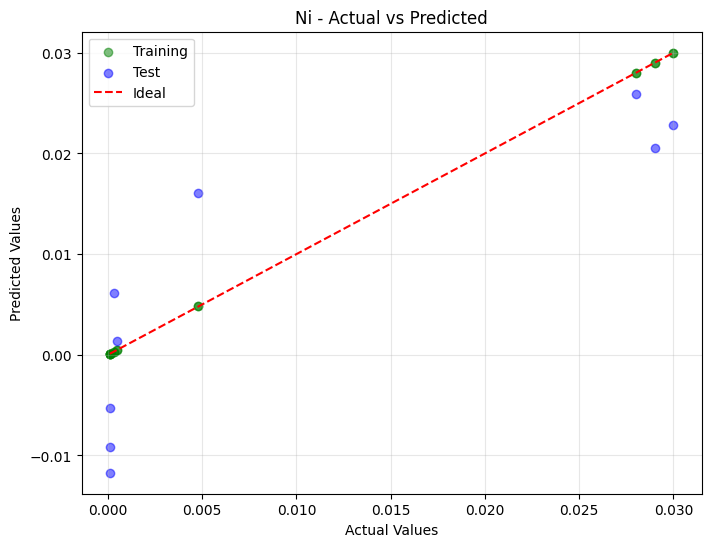

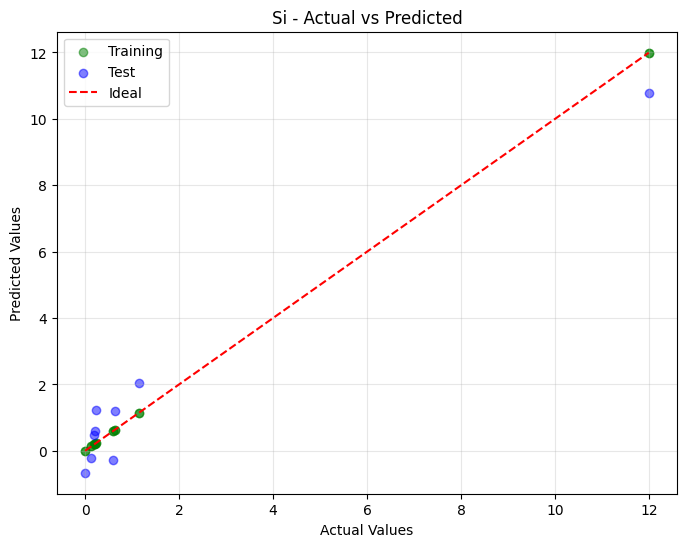

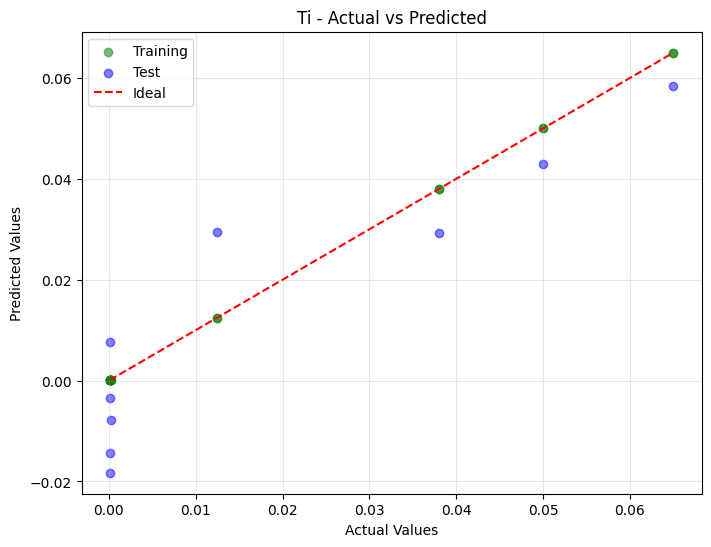

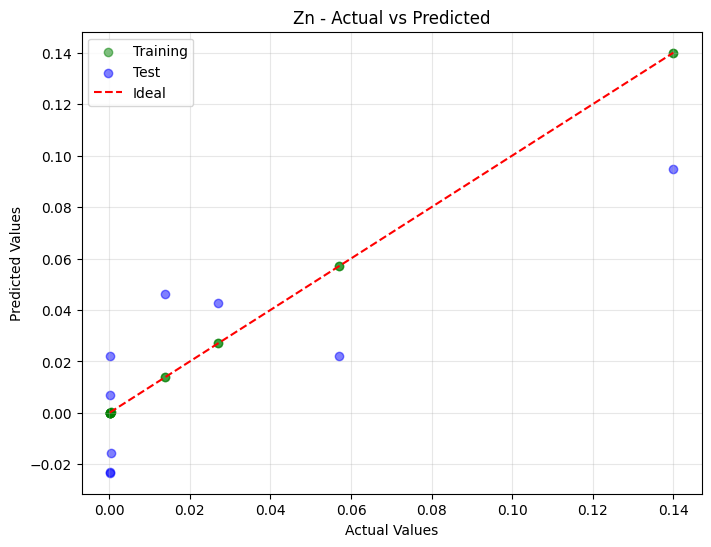

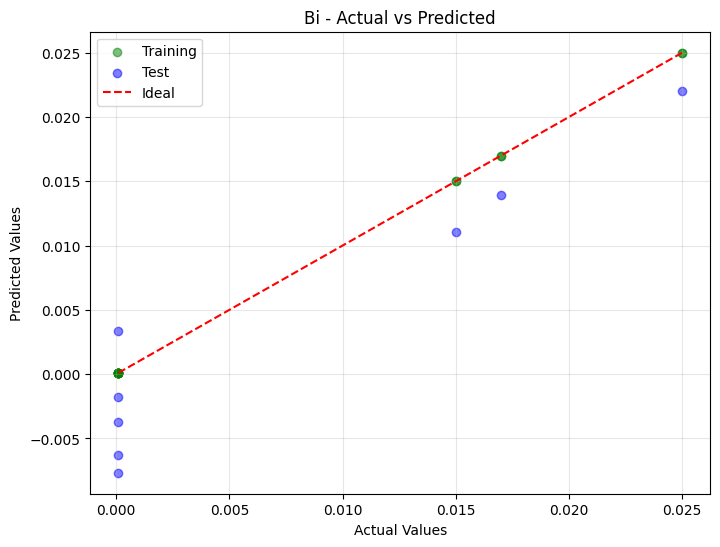

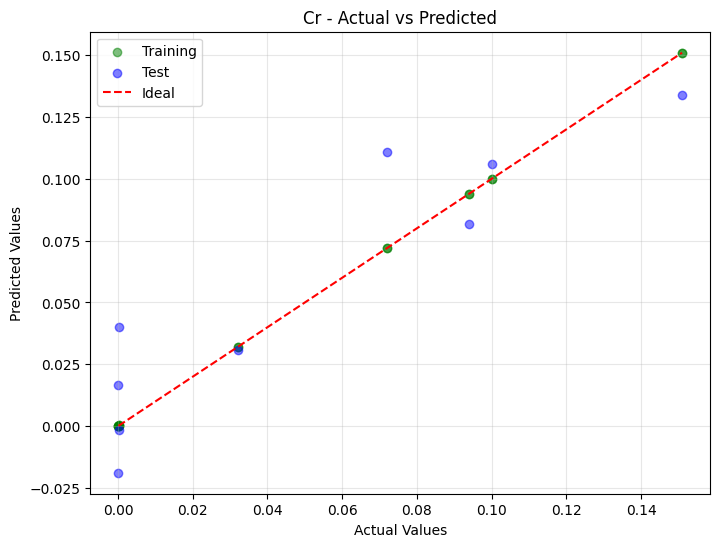

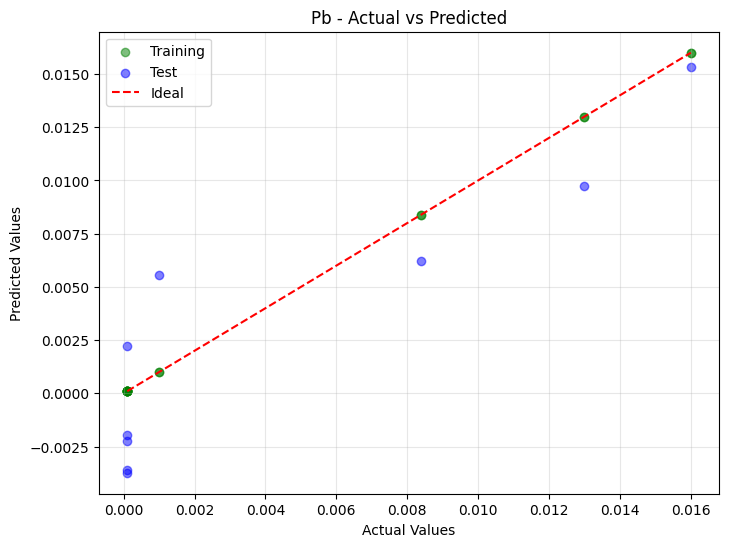

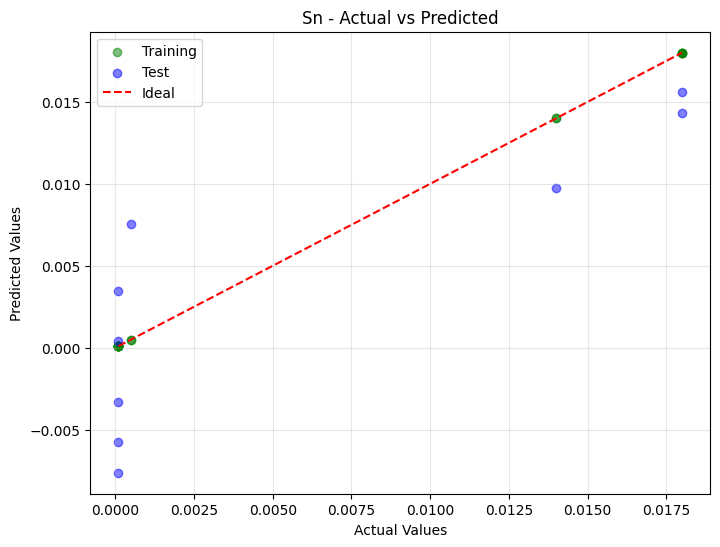

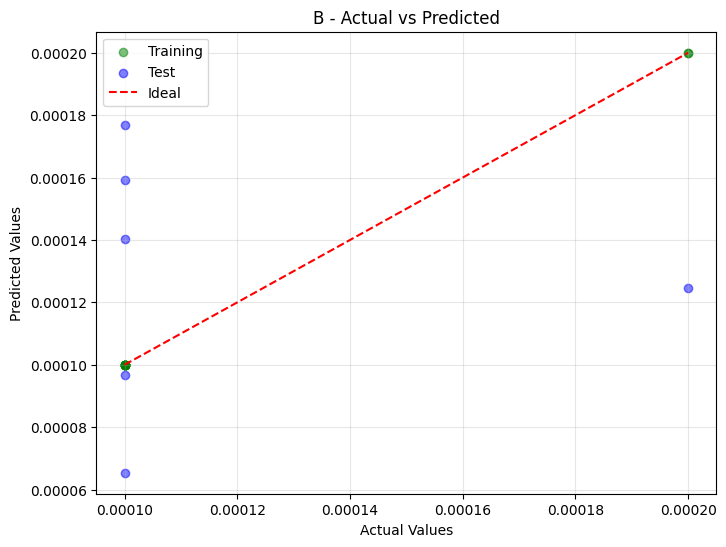

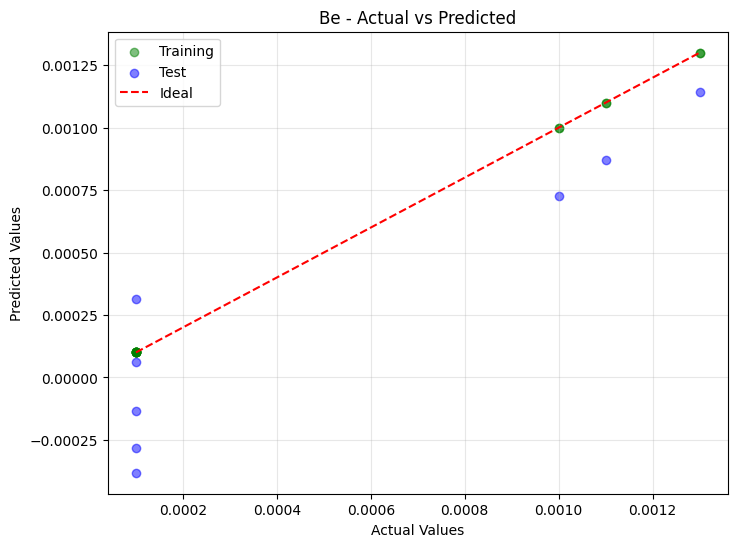

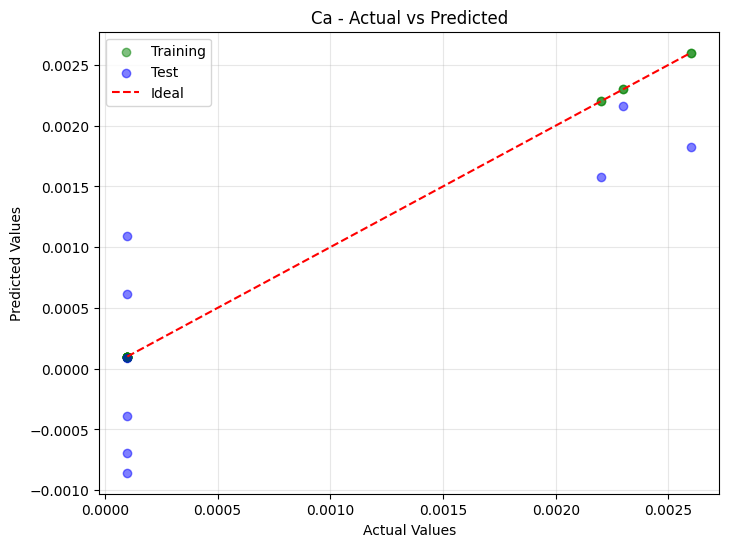

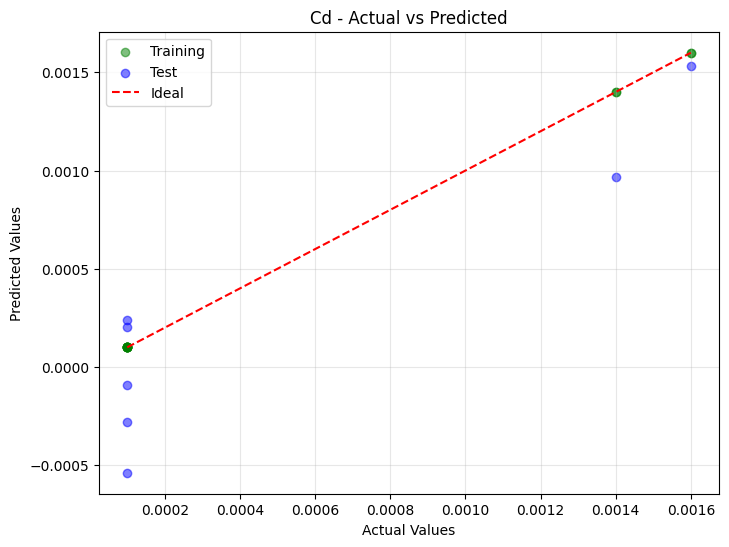

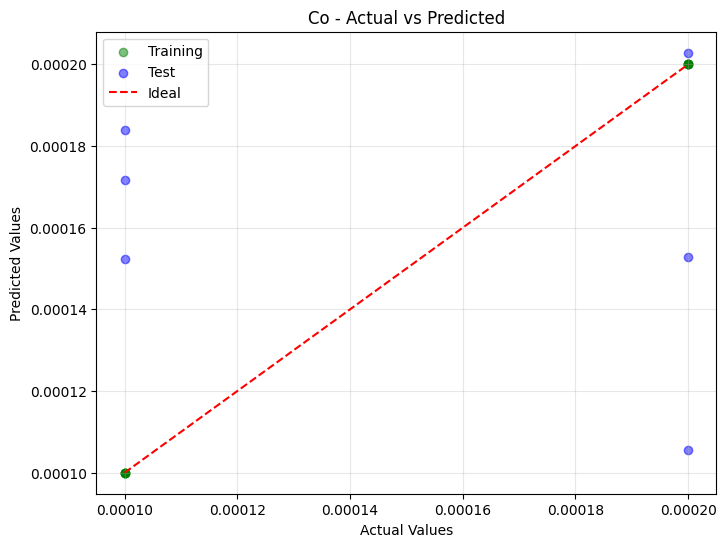

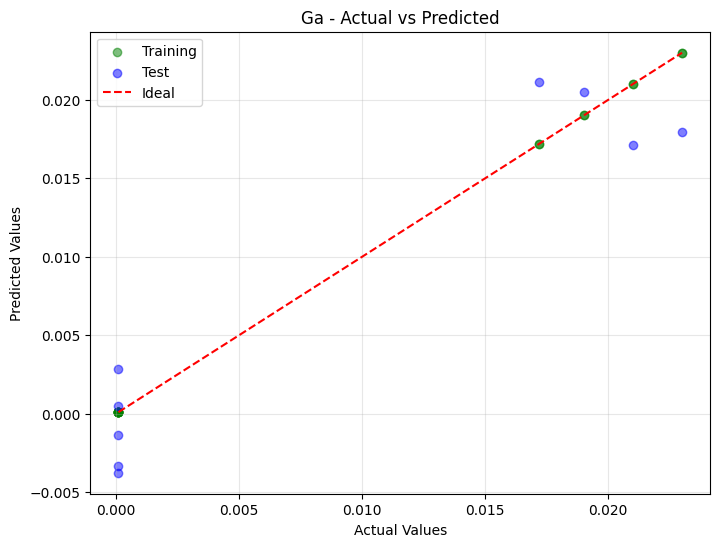

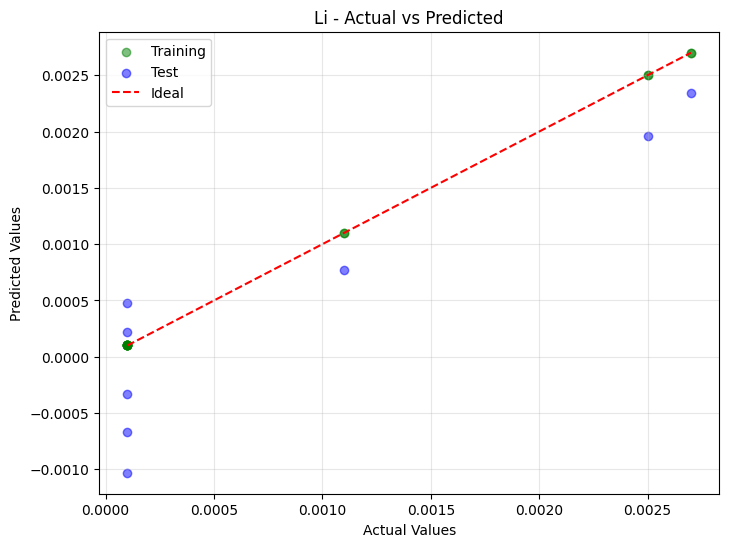

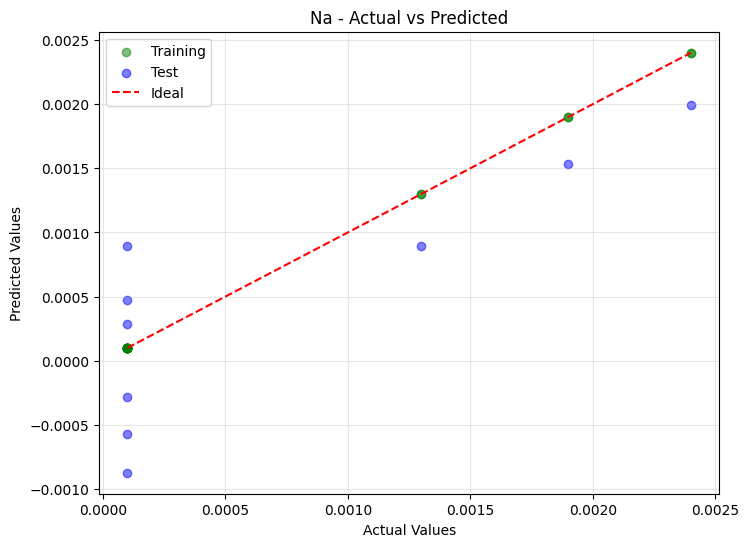

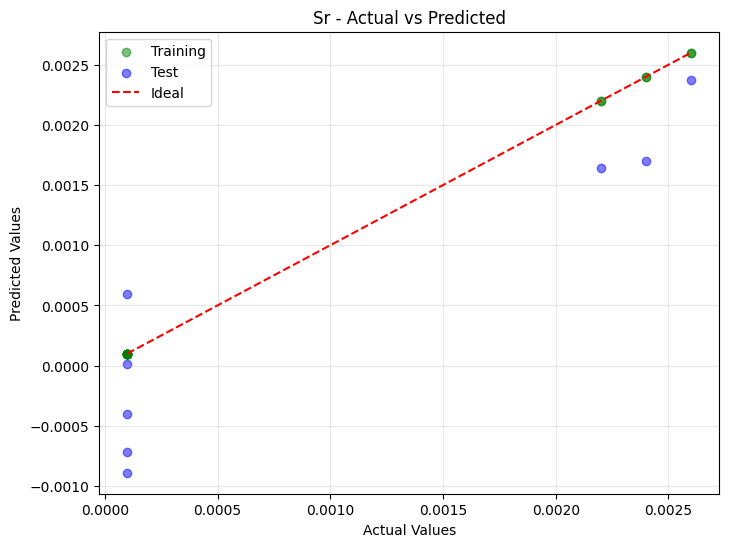

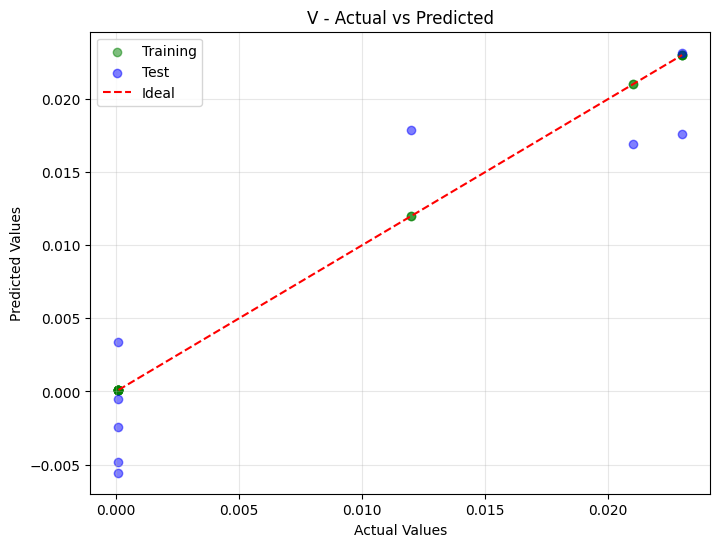

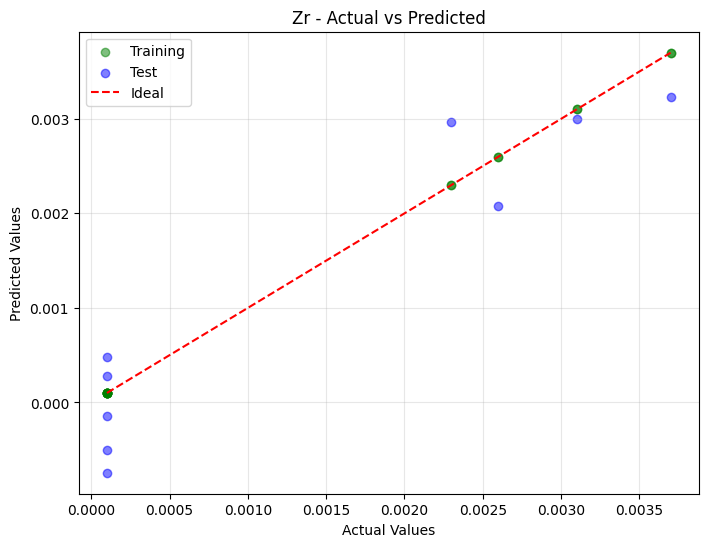

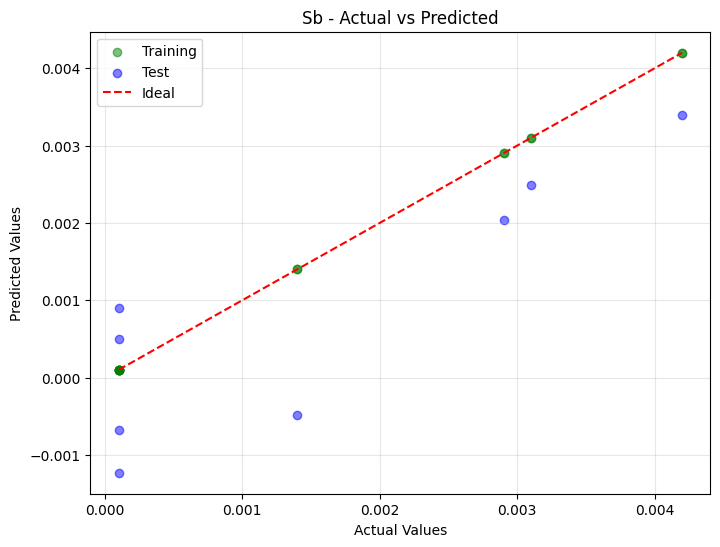

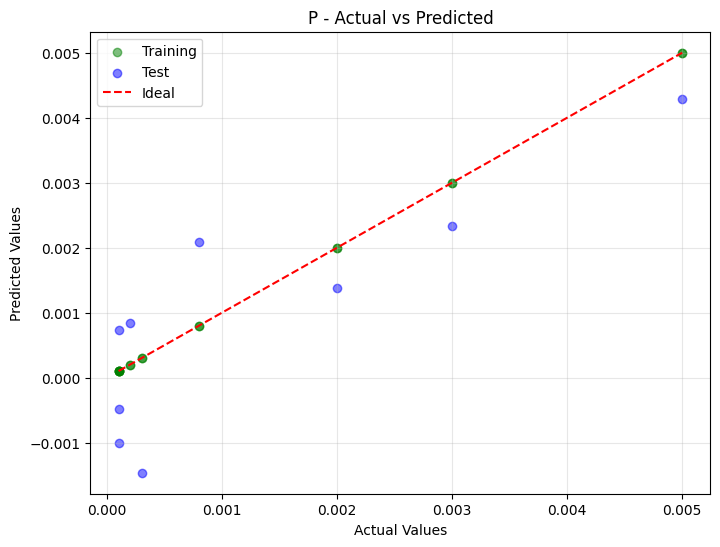

In [7]:
# %% [code] -- Individual Element Plots
elements = ['Cu', 'Fe', 'Mg', 'Mn', 'Ni', 'Si', 'Ti', 'Zn', 'Bi', 
            'Cr', 'Pb', 'Sn', 'B', 'Be', 'Ca', 'Cd', 'Co', 'Ga', 
            'Li', 'Na', 'Sr', 'V', 'Zr', 'Sb', 'P']

for i, element in enumerate(elements):
    plt.figure(figsize=(8, 6))
    
    # Convert actual target values and predicted values to NumPy arrays
    train_actual = y_train.iloc[:, i].to_numpy()
    test_actual = y_test.iloc[:, i].to_numpy()
    
    train_pred = y_pred_train[:, i]
    test_pred = y_pred_test[:, i]
    
    # Create masks that ignore NaN and zero values in both actual and predicted arrays
    mask_train = (~np.isnan(train_actual)) & (train_actual != 0) & (train_pred != 0)
    mask_test  = (~np.isnan(test_actual))  & (test_actual  != 0) & (test_pred  != 0)
    
    # Apply masks to get filtered arrays
    y_train_filtered = train_actual[mask_train]
    train_pred_filtered = train_pred[mask_train]
    
    y_test_filtered = test_actual[mask_test]
    test_pred_filtered = test_pred[mask_test]
    
    # Plot the filtered training and test data
    plt.scatter(y_train_filtered, train_pred_filtered, 
                color='green', alpha=0.5, label='Training')
    plt.scatter(y_test_filtered, test_pred_filtered, 
                color='blue', alpha=0.5, label='Test')
    
    # Plot the ideal line (diagonal)
    min_val = min(y_train_filtered.min(), y_test_filtered.min())
    max_val = max(y_train_filtered.max(), y_test_filtered.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal')
    
    plt.title(f'{element} - Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


In [8]:

# %% [code] -- Metrics
# Calculate and print metrics
print("Element-wise Performance Metrics:\n")
print(f"{'Element':<5} {'Train R²':<10} {'Test R²':<10} {'Train MAE':<10} {'Test MAE':<10}")

for i, element in enumerate(elements):
    train_r2 = metrics.r2_score(y_train.iloc[:, i], y_pred_train[:, i])
    test_r2 = metrics.r2_score(y_test.iloc[:, i], y_pred_test[:, i])
    train_mae = metrics.mean_absolute_error(y_train.iloc[:, i], y_pred_train[:, i])
    test_mae = metrics.mean_absolute_error(y_test.iloc[:, i], y_pred_test[:, i])
    
    print(f"{element:<5} {train_r2:>8.4f} {test_r2:>10.4f} {train_mae:>10.4f} {test_mae:>10.4f}")

# Calculate average metrics
avg_train_r2 = metrics.r2_score(y_train, y_pred_train, multioutput='uniform_average')
avg_test_r2 = metrics.r2_score(y_test, y_pred_test, multioutput='uniform_average')
avg_train_mae = metrics.mean_absolute_error(y_train, y_pred_train, multioutput='uniform_average')
avg_test_mae = metrics.mean_absolute_error(y_test, y_pred_test, multioutput='uniform_average')

print("\nAverage Metrics:")
print(f"Train R²: {avg_train_r2:.4f}  Test R²: {avg_test_r2:.4f}")
print(f"Train MAE: {avg_train_mae:.4f}  Test MAE: {avg_test_mae:.4f}")

Element-wise Performance Metrics:

Element Train R²   Test R²    Train MAE  Test MAE  
Cu      1.0000     0.8911     0.0000     0.0582
Fe      1.0000     0.9176     0.0000     0.0396
Mg      1.0000     0.9968     0.0000     0.0367
Mn      1.0000     0.9747     0.0000     0.0570
Ni      1.0000     0.6572     0.0000     0.0069
Si      1.0000     0.9572     0.0000     0.6904
Ti      1.0000     0.7841     0.0000     0.0101
Zn      1.0000     0.6315     0.0000     0.0244
Bi      1.0000     0.7137     0.0000     0.0045
Cr      1.0000     0.8332     0.0000     0.0170
Pb      1.0000     0.7577     0.0000     0.0028
Sn      1.0000     0.6318     0.0000     0.0042
B       1.0000     0.3769     0.0000     0.0000
Be      1.0000     0.6244     0.0000     0.0003
Ca      1.0000     0.6103     0.0000     0.0006
Cd      1.0000     0.6937     0.0000     0.0003
Co      1.0000     0.4560     0.0000     0.0001
Ga      1.0000     0.8953     0.0000     0.0029
Li      1.0000     0.6336     0.0000     0.0005
N